#  Applied Machine Learning 

## Homework 6: Putting it all together 



## Table of contents

- [Submission instructions](#si)
- [Understanding the problem](#1)
- [Data splitting](#2)
- [EDA](#3)
- (Optional) [Feature engineering](#4)
- [Preprocessing and transformations](#5)
- [Baseline model](#6)
- [Linear models](#7)
- [Different classifiers](#8)
- (Optional) [Feature selection](#9)
- [Hyperparameter optimization](#10)
- [Interpretation and feature importances](#11)
- [Results on the test set](#12)
- (Optional) [Explaining predictions](#13)
- [Summary of the results](#14)

## Imports 

In [1]:
import os

%matplotlib inline
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
#     plot_confusion_matrix,
)
from sklearn.svm import SVC
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC

<br><br>

<br><br>

## Introduction <a name="in"></a>
<hr>

At this point we are at the end of supervised machine learning part of the course. So in this homework, you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips

1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 

4. If you are having trouble running models on your laptop because of the size of the dataset, you can create your train/test split in such a way that you have less data in the train split. If you end up doing this, please write a note to the grader in the submission explaining why you are doing it.  

#### Assessment

We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.

#### A final note

Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (2-8 hours???) is a good guideline for a typical submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

## 1. Understanding the problem <a name="1"></a>
<hr>
rubric={points:4}

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

In [2]:
with open('./desc.txt') as f:
    print(f.read(),end='')

description about each feature

-> ID                                      : ID of each client

-> LIMIT_BAL                               : Amount of given credit in NT dollars (includes individual and 
                                             family/supplementary credit

-> SEX                                     : Gender (1=male, 2=female)

-> EDUCATION                               : (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown,6=unknown)

-> MARRIAGE                                : Marital status (1=married, 2=single, 3=others)

-> AGE                                     : Age in years

-> PAY_0                                   : Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one 
                                             month,2=payment delay for two months, ... 8=payment delay for eight months, 
                                             9=payment delay for nine months and above)

-> PAY_2                                 

<br><br>

In [3]:
df = pd.read_csv("UCI_Credit_Card.csv",sep=',')


In [4]:
df = df.rename(columns={'default.payment.next.month':'default'})

In [5]:
df = df.rename(columns={'PAY_0':'PAY_1'})

In [6]:
df.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [7]:
df['EDUCATION'] = df['EDUCATION'].replace(6,5)  # reason is mention at the end of EDA analysis.

In [8]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 0], dtype=int64)

In [9]:
df['EDUCATION'] = df['EDUCATION'].replace(to_replace=0,value=np.nan)
df['MARRIAGE']=df['MARRIAGE'].replace(0,np.nan)

In [10]:
df = df.dropna(subset=['EDUCATION','MARRIAGE'])

In [11]:
df.EDUCATION = df.EDUCATION.astype('int32')

In [12]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1.0,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2.0,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2.0,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1.0,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1.0,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1.0,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2.0,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2.0,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1.0,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [13]:
df = df.astype({'EDUCATION':'str','PAY_1':'str','PAY_2':'str','PAY_3':'str','PAY_4':'str','PAY_5':'str','PAY_6':'str'})

In [14]:
df.drop(columns=['ID'],inplace=True)

In [15]:
train_df,test_df = train_test_split(df,test_size=0.2,random_state=123)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29932 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  29932 non-null  float64
 1   SEX        29932 non-null  int64  
 2   EDUCATION  29932 non-null  object 
 3   MARRIAGE   29932 non-null  float64
 4   AGE        29932 non-null  int64  
 5   PAY_1      29932 non-null  object 
 6   PAY_2      29932 non-null  object 
 7   PAY_3      29932 non-null  object 
 8   PAY_4      29932 non-null  object 
 9   PAY_5      29932 non-null  object 
 10  PAY_6      29932 non-null  object 
 11  BILL_AMT1  29932 non-null  float64
 12  BILL_AMT2  29932 non-null  float64
 13  BILL_AMT3  29932 non-null  float64
 14  BILL_AMT4  29932 non-null  float64
 15  BILL_AMT5  29932 non-null  float64
 16  BILL_AMT6  29932 non-null  float64
 17  PAY_AMT1   29932 non-null  float64
 18  PAY_AMT2   29932 non-null  float64
 19  PAY_AMT3   29932 non-null  float64
 20  PAY_AM

In [17]:
X_train = train_df.drop(columns=['default'])
y_train = train_df['default']
X_test = test_df.drop(columns=['default'])
y_test = test_df['default']


<br><br>

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

In [18]:
X_train[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE']].describe()

,LIMIT_BAL,SEX,MARRIAGE,AGE
count,23945.000000,23945.000000,23945.000000,23945.000000
mean,167506.940071,1.603174,1.557027,35.461057
std,129774.270162,0.489250,0.518146,9.195068
min,10000.000000,1.000000,1.000000,21.000000
25%,50000.000000,1.000000,1.000000,28.000000
50%,140000.000000,2.000000,2.000000,34.000000
75%,240000.000000,2.000000,2.000000,41.000000
max,1000000.000000,2.000000,3.000000,79.000000


array([[<Axes: title={'center': 'LIMIT_BAL'}>,
        <Axes: title={'center': 'SEX'}>],
       [<Axes: title={'center': 'MARRIAGE'}>,
        <Axes: title={'center': 'AGE'}>]], dtype=object)

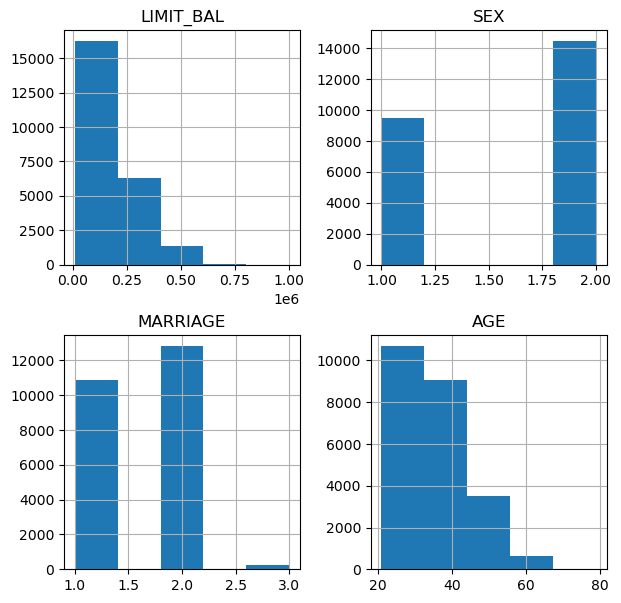

In [19]:
X_train[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE']].hist(bins=5,figsize=[7,7])

In [20]:
X_train['MARRIAGE'].unique()

array([2., 1., 3.])

In [21]:
X_train['MARRIAGE'].value_counts()

2.0    12818
1.0    10867
3.0      260
Name: MARRIAGE, dtype: int64

In [22]:
X_train['EDUCATION'].unique()

array(['1', '2', '3', '5', '4'], dtype=object)

In [23]:
X_train['EDUCATION'].value_counts()

2    11182
1     8511
3     3892
5      265
4       95
Name: EDUCATION, dtype: int64

In [24]:
X_train['EDUCATION']

8847     1
22958    2
5880     1
8574     1
28249    1
        ..
28701    2
17766    3
28092    3
15754    3
20008    1
Name: EDUCATION, Length: 23945, dtype: object

In [25]:
# on education columns 5 and 6 both categories mantion unknow so we can give combine both into one value like 5.

In [26]:
X_train[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,23945,23945,23945,23945,23945,23945
unique,11,11,11,11,10,10
top,0,0,0,0,0,0
freq,11700,12496,12539,13085,13511,12959


array([[<Axes: title={'center': 'PAY_1'}>,
        <Axes: title={'center': 'PAY_2'}>],
       [<Axes: title={'center': 'PAY_3'}>,
        <Axes: title={'center': 'PAY_4'}>],
       [<Axes: title={'center': 'PAY_5'}>,
        <Axes: title={'center': 'PAY_6'}>]], dtype=object)

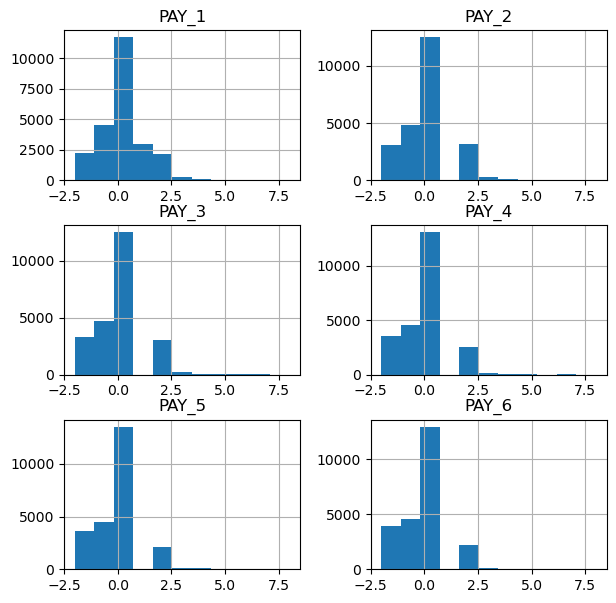

In [27]:
X_train[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].astype('int64').hist(bins=11,figsize=[7,7])

In [28]:
X_train[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,23945.000000,23945.000000,2.394500e+04,23945.000000,23945.000000,23945.000000
mean,50892.733848,48895.050073,4.673617e+04,42999.188014,40009.014575,38550.106076
std,73132.083489,70921.589245,6.940970e+04,64148.734877,60521.343934,59360.681437
min,-165580.000000,-67526.000000,-1.572640e+05,-81334.000000,-61372.000000,-339603.000000
25%,3503.000000,2955.000000,2.609000e+03,2284.000000,1747.000000,1251.000000
50%,22188.000000,20787.000000,1.986400e+04,18950.000000,18043.000000,16903.000000
75%,66979.000000,63882.000000,5.986300e+04,54046.000000,49894.000000,48904.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


array([[<Axes: title={'center': 'BILL_AMT1'}>,
        <Axes: title={'center': 'BILL_AMT2'}>],
       [<Axes: title={'center': 'BILL_AMT3'}>,
        <Axes: title={'center': 'BILL_AMT4'}>],
       [<Axes: title={'center': 'BILL_AMT5'}>,
        <Axes: title={'center': 'BILL_AMT6'}>]], dtype=object)

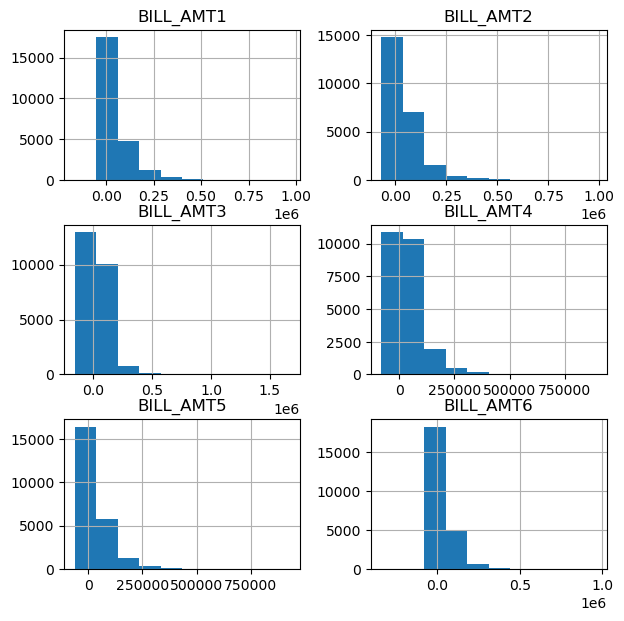

In [29]:
X_train[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].hist(bins=10,figsize=[7,7])

In [30]:
X_train[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,23945.000000,2.394500e+04,23945.000000,23945.000000,23945.000000,23945.000000
mean,5664.761954,5.970863e+03,5206.125914,4791.613698,4793.167968,5263.074755
std,16783.901445,2.442893e+04,17678.666651,15574.132614,15222.285810,17899.524028
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.320000e+02,390.000000,291.000000,245.000000,142.000000
50%,2100.000000,2.004000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,5008.000000,5.000000e+03,4500.000000,4010.000000,4016.000000,4000.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


array([[<Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>],
       [<Axes: title={'center': 'PAY_AMT3'}>,
        <Axes: title={'center': 'PAY_AMT4'}>],
       [<Axes: title={'center': 'PAY_AMT5'}>,
        <Axes: title={'center': 'PAY_AMT6'}>]], dtype=object)

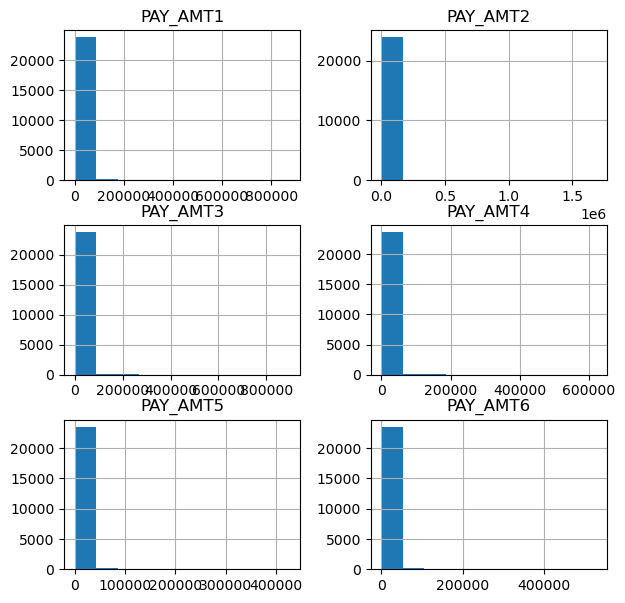

In [31]:
X_train[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].hist(figsize=[7,7])

<Axes: >

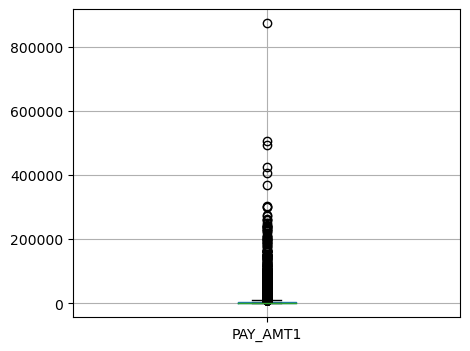

In [32]:
X_train.boxplot(column=['PAY_AMT1'],figsize=[5,4])

C:\Users\pd846\AppData\Local\Temp\ipykernel_11920\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

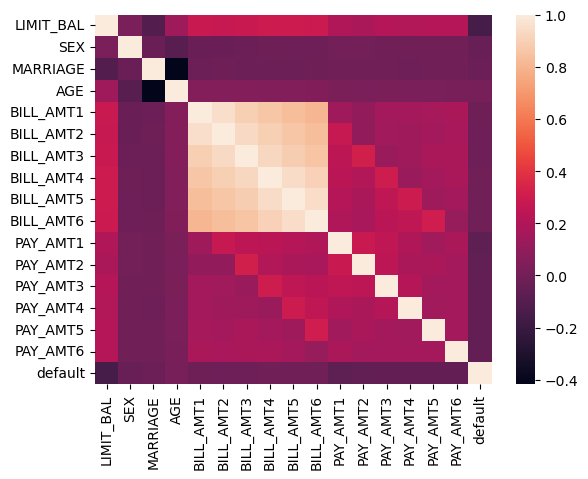

In [33]:
sns.heatmap(df.corr())

replace 0 in education and marriage.(while tranformaer use simoke imputer like most frequent because the munbers of 0 are too few so.)

education: combine 5 and 6 as 5.

Repayment status has 2 unknown values 0 and -2, here we conse=ider as good like 0 as payment done on thime and -2 as done 
payment earlier 2 months ago.


## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<br><br>

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

In [34]:
df['SEX'].unique()

array([2, 1], dtype=int64)

In [35]:
from sklearn import set_config

set_config(display="diagram")

In [36]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
LIMIT_BAL,20000.0,120000.0,90000.0,50000.0,50000.0,50000.0,500000.0,100000.0,140000.0,20000.0,...,140000.0,210000.0,10000.0,100000.0,80000.0,220000.0,150000.0,30000.0,80000.0,50000.0
SEX,2,2,2,2,1,1,1,2,2,1,...,1,1,1,1,1,1,1,1,1,1
EDUCATION,2,2,2,2,2,1,1,2,3,3,...,2,2,3,1,2,3,3,2,3,2
MARRIAGE,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,...,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0
AGE,24,26,34,37,57,37,29,23,28,35,...,41,34,43,38,34,39,43,37,41,46
PAY_1,2,-1,0,0,-1,0,0,0,0,-2,...,0,3,0,0,2,0,-1,4,1,0
PAY_2,2,2,0,0,0,0,0,-1,0,-2,...,0,2,0,-1,2,0,-1,3,-1,0
PAY_3,-1,0,0,0,-1,0,0,-1,2,-2,...,0,2,0,-1,2,0,-1,2,0,0
PAY_4,-1,0,0,0,0,0,0,0,0,-2,...,0,2,-2,0,2,0,-1,-1,0,0
PAY_5,-2,0,0,0,0,0,0,0,0,-1,...,0,2,-2,0,2,0,0,0,0,0


In [37]:
numeric_feac = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
category_feac_OHE = ['MARRIAGE','SEX']
category_feac_ord_pay= ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
category_feac_ord_edu = ['EDUCATION']
# drop = ['ID']
category_feac_ord_pay_order =[['8','7','6','5','4','3','2','1','0','-1','-2']]*6
# '8','7','6','5','4','3','2','1','0','-1','-2'
category_feac_ord_edu_order = [['5','4','1','3','2']]
# '5','4','1','3','2'


# scalling_columns  = ['AGE','LIMIT_BAL' ,'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
# ohe_columns = ['SEX','MARRIAGE']
# drops_columns = ['ID']
# pass_through_columns = list(set(X_train.columns).difference(set(scalling_columns+ohe_columns+drops_columns)))

In [38]:
ct =make_column_transformer(
    (make_pipeline(SimpleImputer(),StandardScaler()),numeric_feac),
    (make_pipeline(SimpleImputer(),OneHotEncoder(handle_unknown='ignore',sparse_output=True,drop='if_binary',dtype=int)),category_feac_OHE),
    (make_pipeline(OrdinalEncoder(categories=category_feac_ord_pay_order,dtype=int),StandardScaler()),category_feac_ord_pay),
    (make_pipeline(OrdinalEncoder(categories=category_feac_ord_edu_order,dtype=int),StandardScaler()),category_feac_ord_edu),
#     ('passthrough',category_feac_ord_pay)
)

# ct = make_column_transformer(
#     (StandardScaler(),scalling_columns),
#     (OneHotEncoder(handle_unknown='ignore'),ohe_columns),
# #     ('drop',drops_columns),
#     ('passthrough',pass_through_columns)
# )
ct

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImpu...
                                                                              '1',
                                                                              '0',
                                                                              '-1',
                                                                              '-2'],
                                                                             ['8',
                                                                              '7',
                                                                              '6',
                                                                              '5',
                                                                              '4',
                                                                              '3',
                                                                              '2',
                                                                              '1',
                                                                              '0',
                                                                              '-1',
                                                                              '-2']],
                                                                 dtype=<class 'int'>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                  'PAY_6']),
                                ('pipeline-4',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['5',
                                                                              '4',
                                                                              '1',
                                                                              '3',
                                                                              '2']],
                                                                 dtype=<class 'int'>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['EDUCATION'])])

In [39]:
ct1 = ct.fit_transform(X_train)

In [40]:
colm = numeric_feac + ct.named_transformers_['pipeline-2'].named_steps['onehotencoder'].get_feature_names_out().tolist() + ct.named_transformers_['pipeline-3'].named_steps['ordinalencoder'].get_feature_names_out().tolist() + ct.named_transformers_['pipeline-4'].named_steps['ordinalencoder'].get_feature_names_out().tolist()

In [151]:
ct_df = pd.DataFrame(ct1,columns=colm,index=X_train.index)

In [152]:
ct_df


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,x0_2.0,x0_3.0,x1_2.0,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,EDUCATION
8847,0.250387,-0.267655,-0.647277,-0.690284,-0.674216,-0.643194,-0.661087,-0.649435,-0.337519,-0.244423,...,1.0,0.0,0.0,0.868255,0.719381,1.525257,0.664000,0.645357,1.485532,-1.108214
22958,0.327445,1.146176,1.145995,1.183077,0.930708,1.107415,0.449685,0.515957,0.028852,-0.076585,...,0.0,0.0,1.0,-0.016216,-0.110368,-0.138477,-0.188611,-0.236819,-0.254608,0.962418
5880,0.173328,-0.050143,-0.355798,-0.357769,-0.354701,-0.305019,-0.294712,-0.268737,-0.229854,-0.162551,...,1.0,0.0,0.0,-0.016216,-0.110368,-0.138477,-0.188611,-0.236819,-0.254608,-1.108214
8574,-0.134906,-0.376411,-0.695916,-0.689438,-0.673352,-0.670319,-0.661087,-0.649435,-0.337519,-0.244423,...,0.0,0.0,1.0,-0.900686,1.549130,1.525257,1.516611,1.527532,1.485532,-1.108214
28249,-0.134906,-0.267655,-0.695957,-0.684503,-0.673352,-0.656865,-0.646827,-0.649435,-0.316486,-0.244423,...,0.0,0.0,1.0,-0.900686,0.719381,0.693390,0.664000,-0.236819,-0.254608,-1.108214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28701,-0.211964,-0.050143,0.464652,0.473433,0.540265,0.614722,0.684996,0.751521,-0.099190,-0.080270,...,1.0,0.0,1.0,-0.016216,-0.110368,-0.138477,-0.188611,-0.236819,-0.254608,0.962418
17766,-0.289023,2.124982,0.894883,1.024377,1.174310,1.125608,1.010392,0.966062,0.262056,0.574296,...,1.0,0.0,1.0,-0.016216,-0.110368,-0.138477,-0.188611,-0.236819,-0.254608,-0.072898
28092,-0.289023,1.146176,1.109020,1.174307,1.241795,1.385353,1.498643,1.526697,-0.039608,-0.039743,...,1.0,0.0,1.0,-0.016216,-0.110368,-0.138477,-0.188611,-0.236819,-0.254608,-0.072898
15754,0.250387,-1.137705,-0.587480,-0.607797,-0.531395,-0.587166,-0.570522,-0.458328,-0.257500,-0.038392,...,1.0,0.0,1.0,-0.016216,-0.110368,-0.138477,-0.188611,0.645357,0.615462,-0.072898


<br><br>

## 6. Baseline model <a name="6"></a>
<hr>

rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

In [41]:
pip = make_pipeline(ct,DummyClassifier())

In [42]:
X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
8847,200000.0,1,1,2.0,33,-1,-1,-2,-1,-1,...,-60.0,1740.0,0.0,0.0,0.0,0.0,1800.0,0.0,0.0,0.0
22958,210000.0,2,2,1.0,46,0,0,0,0,0,...,111335.0,114037.0,67224.0,69177.0,6149.0,4100.0,4547.0,2500.0,3000.0,2500.0
5880,190000.0,1,1,2.0,35,0,0,0,0,0,...,22117.0,23433.0,22173.0,22598.0,1807.0,2000.0,2010.0,1003.0,2007.0,3019.0
8574,150000.0,2,1,1.0,32,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28249,150000.0,2,1,1.0,33,1,-1,-1,-1,0,...,0.0,863.0,863.0,0.0,353.0,0.0,863.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28701,140000.0,2,2,2.0,35,0,0,0,0,0,...,84235.0,82432.0,81465.0,83160.0,4000.0,4010.0,3800.0,3200.0,3100.0,3000.0
17766,130000.0,2,3,2.0,55,0,0,0,0,0,...,128243.0,115204.0,101158.0,95895.0,10063.0,20000.0,10009.0,10000.0,5000.0,5000.0
28092,130000.0,2,3,2.0,46,0,0,0,0,0,...,132927.0,131866.0,130707.0,129174.0,5000.0,5000.0,4600.0,5000.0,4614.0,5139.0
15754,200000.0,2,3,2.0,25,0,0,0,0,-1,...,9853.0,5334.0,5481.0,11344.0,1343.0,5033.0,3516.0,5497.0,11378.0,12774.0


In [43]:
bas_score = cross_validate(pip,X_train,y_train,return_train_score=True)

In [46]:
pd.DataFrame(bas_score)

,fit_time,score_time,test_score,train_score
0,0.102043,0.022460,0.778033,0.778033
1,0.092113,0.018614,0.778033,0.778033
2,0.086179,0.021992,0.778033,0.778033
3,0.076639,0.018003,0.778033,0.778033
4,0.075986,0.023009,0.778033,0.778033


<br><br>

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:12}

**Your tasks:**

1. Try logistic regression as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter `C`. 
3. Report validation scores along with standard deviation. 
4. Summarize your results.

In [55]:
ct

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImpu...
                                                                              '1',
                                                                              '0',
                                                                              '-1',
                                                                              '-2'],
                                                                             ['8',
                                                                              '7',
                                                                              '6',
                                                                              '5',
                                                                              '4',
                                                                              '3',
                                                                              '2',
                                                                              '1',
                                                                              '0',
                                                                              '-1',
                                                                              '-2']],
                                                                 dtype=<class 'int'>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                  'PAY_6']),
                                ('pipeline-4',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['5',
                                                                              '4',
                                                                              '1',
                                                                              '3',
                                                                              '2']],
                                                                 dtype=<class 'int'>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['EDUCATION'])])

In [56]:
log_pipe = make_pipeline(ct,LogisticRegression(max_iter=1000))

In [59]:
score = cross_validate(log_pipe,X_train,y_train,n_jobs=-1,verbose=3,return_train_score=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


In [60]:
pd.DataFrame(score)

,fit_time,score_time,test_score,train_score
0,0.152894,0.018896,0.804134,0.808311
1,0.166093,0.021592,0.808102,0.807214
2,0.173882,0.016429,0.804134,0.808624
3,0.166995,0.017747,0.807893,0.808154
4,0.162975,0.022941,0.812278,0.807267


In [49]:
# param_grid = [    
#     {
#       'logisticregression__C' : np.logspace(-4, 4, 10),
#       'logisticregression__solver' : ['lbfgs','newton-cg','liblinear']
#     }
# ]

In [50]:
# gridcv = GridSearchCV(log_pipe,param_grid=param_grid,cv=3,return_train_score=True,n_jobs=-1,verbose=True)

In [50]:
# gridcv.fit(X_train,y_train)

In [ ]:
# pd.DataFrame(gridcv.cv_results_).T

In [52]:
# gridcv.best_params_

In [53]:
# df.default.value_counts(normalize=True)

In [54]:
# gridcv.best_score_


<br><br>

## 8. Different classifiers <a name="8"></a>
<hr>
rubric={points:15}

**Your tasks:**
1. Try at least 3 other models aside from logistic regression. At least one of these models should be a tree-based ensemble model (e.g., lgbm, random forest, xgboost). 
2. Summarize your results. Can you beat logistic regression? 

# Random Forest

In [61]:
pip3 = make_pipeline(ct,RandomForestClassifier(n_estimators=35))

In [62]:
rand_score = cross_validate(pip3,X_train,y_train,cv = 10,n_jobs=-1,verbose=3,return_train_score= True )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    7.9s remaining:   18.5s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    8.0s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.2s finished


In [63]:
pd.DataFrame(rand_score)

,fit_time,score_time,test_score,train_score
0,6.475174,0.089401,0.813361,0.998144
1,6.358518,0.059706,0.809186,0.998097
2,6.429620,0.080526,0.815449,0.998701
3,6.552669,0.059806,0.813361,0.998329
4,6.263615,0.078785,0.813779,0.998237
5,6.269019,0.085220,0.802840,0.998747
6,6.306231,0.059275,0.799916,0.998608
7,6.171718,0.058954,0.806600,0.998283
8,6.378000,0.080885,0.804094,0.998098
9,6.286082,0.061377,0.806600,0.999026


In [64]:
pd.DataFrame(rand_score)['test_score'].mean()

0.8085185824686978

# SVC 

In [68]:
pip5= make_pipeline(ct,SVC())

In [69]:
svc_score = cross_validate(pip5,X_train,y_train,verbose=3,n_jobs=-1,return_train_score=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   55.8s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   56.6s finished


In [71]:
pd.DataFrame(svc_score)

,fit_time,score_time,test_score,train_score
0,23.187978,6.422079,0.816663,0.822928
1,23.360222,6.634298,0.821883,0.822092
2,22.713422,6.502208,0.814993,0.822562
3,23.559742,6.426358,0.818542,0.821622
4,23.223312,6.428967,0.814366,0.822458


In [72]:
from catboost import CatBoostClassifier
from lightgbm.sklearn import LGBMClassifier
from xgboost import XGBClassifier

In [75]:
pip6 = make_pipeline(ct,CatBoostClassifier(verbose=3,random_state=123))
pip7 = make_pipeline(ct,LGBMClassifier(random_state=123))
pip8 = make_pipeline(ct,XGBClassifier(random_state=123, eval_metric="logloss", verbose=3))

In [76]:
cat_score = cross_validate(pip6,X_train,y_train,n_jobs=-1,return_train_score=True,verbose=3)
lgbm_score = cross_validate(pip7,X_train,y_train,n_jobs=-1,return_train_score=True,verbose=3)
xgb_score = cross_validate(pip8,X_train,y_train,n_jobs=-1,return_train_score=True,verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   31.9s remaining:   47.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   32.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.5s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.8s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.9s finished


In [82]:
pd.DataFrame(cat_score)['train_score'].mean()

0.8571100438504906

In [81]:
pd.DataFrame(lgbm_score)['train_score'].mean()

0.8461891835456254

In [80]:
pd.DataFrame(xgb_score)['train_score'].mean()

0.895907287533932

<br><br>

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:1}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<br><br>

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:15}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. You may pick one of the best performing models from the previous exercise and tune hyperparameters only for that model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

In [211]:
prm = {
    'xgbclassifier__n_estimators':[100,200,400,800,1000,1400],
    'xgbclassifier__max_depth' : [3,4,5,6,7]
}

In [212]:
grid_xgb = GridSearchCV(pip8,prm,return_train_score=True,verbose=3,n_jobs=-1)

In [213]:
grid_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[15:25:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "verbose" } are not used.



GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['LIMIT_BAL',
                                                                          'AGE',
                                                                          'BILL_AMT1',
                                                                          'BILL_AMT2',
                                                                          'BILL_AMT3',
                                                                          'BILL_AMT4',
                                                                          'BILL_AMT5',
                                                                          'BILL_AMT6',
                                                                          'PAY_AMT1',
                                                                          'PAY_AMT2',
                                                                          'PAY_AMT3',
                                                                          'PAY_AMT4',
                                                                          'PAY_AMT5',
                                                                          'PAY_AMT6'...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=123, ...))]),
             n_jobs=-1,
             param_grid={'xgbclassifier__max_depth': [3, 4, 5, 6, 7],
                         'xgbclassifier__n_estimators': [100, 200, 400, 800,
                                                         1000, 1400]},
             return_train_score=True, verbose=3)

In [214]:
pd.DataFrame(grid_xgb.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
mean_fit_time,2.938415,7.755011,26.178936,57.740119,84.353281,126.198659,12.15896,24.192803,46.905833,96.558634,...,75.602775,145.470946,177.639828,249.62719,21.721839,45.192349,85.881608,162.332639,163.930919,176.025855
std_fit_time,0.126114,0.382479,1.027023,4.438076,3.734222,2.016491,0.893617,0.66401,1.324988,3.18139,...,3.999503,4.822659,3.715002,3.420416,1.67074,2.405012,2.694254,2.469362,7.453272,5.965401
mean_score_time,0.03263,0.125585,0.2086,0.208738,0.213407,0.358121,0.075008,0.075375,0.139942,0.236658,...,0.279977,0.541239,0.439207,0.616056,0.070756,0.217192,0.334372,0.302874,0.266132,0.310175
std_score_time,0.002089,0.116128,0.160032,0.081477,0.146078,0.158088,0.063608,0.030614,0.068122,0.218966,...,0.146995,0.131937,0.230525,0.317692,0.022171,0.127008,0.25349,0.056949,0.059096,0.009056
param_xgbclassifier__max_depth,3,3,3,3,3,3,4,4,4,4,...,6,6,6,6,7,7,7,7,7,7
param_xgbclassifier__n_estimators,100,200,400,800,1000,1400,100,200,400,800,...,400,800,1000,1400,100,200,400,800,1000,1400
params,"{'xgbclassifier__max_depth': 3, 'xgbclassifier...","{'xgbclassifier__max_depth': 3, 'xgbclassifier...","{'xgbclassifier__max_depth': 3, 'xgbclassifier...","{'xgbclassifier__max_depth': 3, 'xgbclassifier...","{'xgbclassifier__max_depth': 3, 'xgbclassifier...","{'xgbclassifier__max_depth': 3, 'xgbclassifier...","{'xgbclassifier__max_depth': 4, 'xgbclassifier...","{'xgbclassifier__max_depth': 4, 'xgbclassifier...","{'xgbclassifier__max_depth': 4, 'xgbclassifier...","{'xgbclassifier__max_depth': 4, 'xgbclassifier...",...,"{'xgbclassifier__max_depth': 6, 'xgbclassifier...","{'xgbclassifier__max_depth': 6, 'xgbclassifier...","{'xgbclassifier__max_depth': 6, 'xgbclassifier...","{'xgbclassifier__max_depth': 6, 'xgbclassifier...","{'xgbclassifier__max_depth': 7, 'xgbclassifier...","{'xgbclassifier__max_depth': 7, 'xgbclassifier...","{'xgbclassifier__max_depth': 7, 'xgbclassifier...","{'xgbclassifier__max_depth': 7, 'xgbclassifier...","{'xgbclassifier__max_depth': 7, 'xgbclassifier...","{'xgbclassifier__max_depth': 7, 'xgbclassifier..."
split0_test_score,0.815828,0.815202,0.811652,0.806849,0.807475,0.803508,0.813113,0.811234,0.807684,0.803299,...,0.80142,0.798497,0.799749,0.799332,0.809146,0.805596,0.802464,0.795991,0.796617,0.794738
split1_test_score,0.81729,0.815619,0.809355,0.810399,0.807684,0.806223,0.814993,0.814366,0.809981,0.802673,...,0.80497,0.802255,0.805179,0.798497,0.81019,0.807475,0.807267,0.805179,0.802046,0.800585
split2_test_score,0.818334,0.816246,0.813531,0.806223,0.801838,0.800793,0.818125,0.811025,0.806014,0.802882,...,0.800793,0.795364,0.798079,0.797452,0.806223,0.802255,0.798705,0.795156,0.797035,0.796617


In [195]:
grid_xgb.best_params_

{'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 100}

In [196]:
pip10 = make_pipeline(ct,XGBClassifier(max_depth = 3,n_estimators = 100))

In [197]:
pip10.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6']),
                                                 ('pipeline-2',
                                                  Pipeli...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [198]:
pip10.score(X_test,y_test)

0.8284616669450476

In [199]:
confusion_matrix(y_test,pip10.predict(X_test))

array([[4456,  215],
       [ 812,  504]], dtype=int64)

<br><br>

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:15}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to explain feature importances of one of the best performing models. Summarize your observations. 

In [154]:
!pip install shap

     -------------------------------------- 435.6/435.6 kB 3.4 MB/s eta 0:00:00


In [157]:
pip7.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6']),
                                                 ('pipeline-2',
                                                  Pipeli...
                                                                                               '-1',
                                                                                               '-2']],
                                                                                  dtype=<class 'int'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['PAY_1', 'PAY_2', 'PAY_3',
                                                   'PAY_4', 'PAY_5', 'PAY_6']),
                                                 ('pipeline-4',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['5',
                                                                                               '4',
                                                                                               '1',
                                                                                               '3',
                                                                                               '2']],
                                                                                  dtype=<class 'int'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['EDUCATION'])])),
                ('lgbmclassifier', LGBMClassifier(random_state=123))])

In [159]:
train_lgbm_shap_values[1].shape

(23945, 25)

In [158]:
import shap

lgbm_explainer = shap.TreeExplainer(pip7.named_steps["lgbmclassifier"])
train_lgbm_shap_values = lgbm_explainer.shap_values(ct_df)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [161]:
shap.initjs()

In [163]:
X_train


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
8847,200000.0,1,1,2.0,33,-1,-1,-2,-1,-1,...,-60.0,1740.0,0.0,0.0,0.0,0.0,1800.0,0.0,0.0,0.0
22958,210000.0,2,2,1.0,46,0,0,0,0,0,...,111335.0,114037.0,67224.0,69177.0,6149.0,4100.0,4547.0,2500.0,3000.0,2500.0
5880,190000.0,1,1,2.0,35,0,0,0,0,0,...,22117.0,23433.0,22173.0,22598.0,1807.0,2000.0,2010.0,1003.0,2007.0,3019.0
8574,150000.0,2,1,1.0,32,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28249,150000.0,2,1,1.0,33,1,-1,-1,-1,0,...,0.0,863.0,863.0,0.0,353.0,0.0,863.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28701,140000.0,2,2,2.0,35,0,0,0,0,0,...,84235.0,82432.0,81465.0,83160.0,4000.0,4010.0,3800.0,3200.0,3100.0,3000.0
17766,130000.0,2,3,2.0,55,0,0,0,0,0,...,128243.0,115204.0,101158.0,95895.0,10063.0,20000.0,10009.0,10000.0,5000.0,5000.0
28092,130000.0,2,3,2.0,46,0,0,0,0,0,...,132927.0,131866.0,130707.0,129174.0,5000.0,5000.0,4600.0,5000.0,4614.0,5139.0
15754,200000.0,2,3,2.0,25,0,0,0,0,-1,...,9853.0,5334.0,5481.0,11344.0,1343.0,5033.0,3516.0,5497.0,11378.0,12774.0


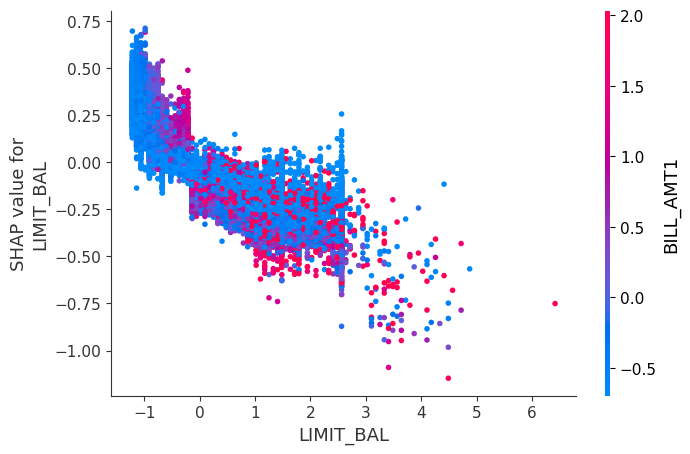

In [164]:
shap.dependence_plot("LIMIT_BAL", train_lgbm_shap_values[1], ct_df)

In [170]:
train_lgbm_shap_values[1]

array([[-0.14160707, -0.06479063,  0.13182266, ..., -0.01404306,
        -0.0607817 ,  0.02320158],
       [-0.1935488 ,  0.0743591 , -0.00306132, ..., -0.02888165,
        -0.03184528,  0.01859208],
       [-0.21362821,  0.00258119, -0.35993324, ..., -0.03305495,
        -0.03566367, -0.02503173],
       ...,
       [ 0.15711915,  0.07930395, -0.00556412, ..., -0.02669283,
        -0.0383703 ,  0.03149012],
       [-0.12596365, -0.02380951,  0.03036639, ..., -0.04896635,
        -0.0293091 ,  0.02773335],
       [-0.1215443 , -0.04409059, -0.19584051, ..., -0.03043192,
        -0.03587452, -0.00143869]])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


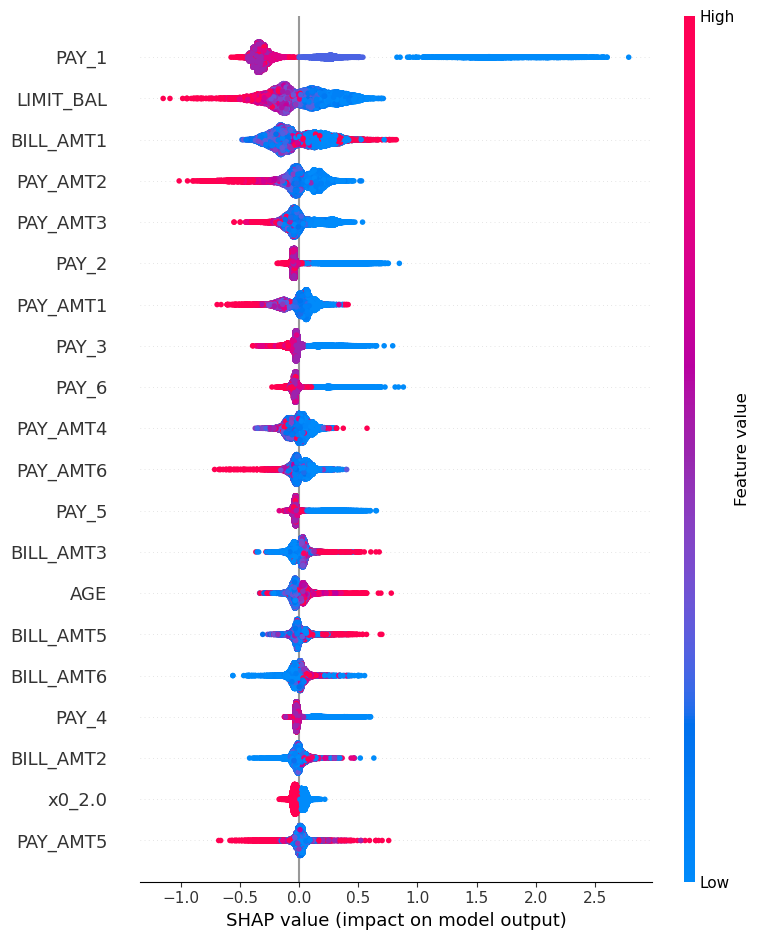

In [166]:
shap.summary_plot(train_lgbm_shap_values[1], ct_df )

In [171]:
# all pay_1,2,3,4... have great impact on positive class,
# bill_amt is also imp feature and age also

<br><br>

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:5}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 

### LGBMClassifier

In [172]:
pip7.fit(X_test,y_test)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6']),
                                                 ('pipeline-2',
                                                  Pipeli...
                                                                                               '-1',
                                                                                               '-2']],
                                                                                  dtype=<class 'int'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['PAY_1', 'PAY_2', 'PAY_3',
                                                   'PAY_4', 'PAY_5', 'PAY_6']),
                                                 ('pipeline-4',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['5',
                                                                                               '4',
                                                                                               '1',
                                                                                               '3',
                                                                                               '2']],
                                                                                  dtype=<class 'int'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['EDUCATION'])])),
                ('lgbmclassifier', LGBMClassifier(random_state=123))])

In [235]:
pip7.score(X_train,y_train)

0.814992691584882

In [173]:
pip7.score(X_test,y_test)

0.9094705194588275

In [174]:
confusion_matrix(y_test,pip7.predict(X_test))

array([[4623,   48],
       [ 494,  822]], dtype=int64)

### CATBoost


In [215]:
pip6.fit(X_train,y_train)

Learning rate set to 0.039981
0:	learn: 0.6713166	total: 174ms	remaining: 2m 53s
3:	learn: 0.6165640	total: 242ms	remaining: 1m
6:	learn: 0.5745876	total: 282ms	remaining: 40s
9:	learn: 0.5429781	total: 312ms	remaining: 30.9s
12:	learn: 0.5184152	total: 346ms	remaining: 26.3s
15:	learn: 0.4996870	total: 377ms	remaining: 23.2s
18:	learn: 0.4851611	total: 414ms	remaining: 21.4s
21:	learn: 0.4736102	total: 449ms	remaining: 20s
24:	learn: 0.4648888	total: 483ms	remaining: 18.9s
27:	learn: 0.4582403	total: 516ms	remaining: 17.9s
30:	learn: 0.4526029	total: 550ms	remaining: 17.2s
33:	learn: 0.4485529	total: 583ms	remaining: 16.6s
36:	learn: 0.4449102	total: 616ms	remaining: 16s
39:	learn: 0.4422220	total: 659ms	remaining: 15.8s
42:	learn: 0.4398803	total: 700ms	remaining: 15.6s
45:	learn: 0.4378532	total: 734ms	remaining: 15.2s
48:	learn: 0.4362089	total: 763ms	remaining: 14.8s
51:	learn: 0.4346838	total: 795ms	remaining: 14.5s
54:	learn: 0.4335221	total: 824ms	remaining: 14.2s
57:	learn: 0.

486:	learn: 0.3866471	total: 6.29s	remaining: 6.63s
489:	learn: 0.3863202	total: 6.33s	remaining: 6.59s
492:	learn: 0.3861266	total: 6.37s	remaining: 6.55s
495:	learn: 0.3859230	total: 6.41s	remaining: 6.51s
498:	learn: 0.3855988	total: 6.47s	remaining: 6.49s
501:	learn: 0.3853848	total: 6.52s	remaining: 6.47s
504:	learn: 0.3851415	total: 6.56s	remaining: 6.43s
507:	learn: 0.3848986	total: 6.61s	remaining: 6.4s
510:	learn: 0.3847005	total: 6.66s	remaining: 6.37s
513:	learn: 0.3844067	total: 6.7s	remaining: 6.33s
516:	learn: 0.3842018	total: 6.73s	remaining: 6.29s
519:	learn: 0.3838573	total: 6.77s	remaining: 6.25s
522:	learn: 0.3835475	total: 6.82s	remaining: 6.22s
525:	learn: 0.3832917	total: 6.86s	remaining: 6.18s
528:	learn: 0.3830251	total: 6.89s	remaining: 6.14s
531:	learn: 0.3828826	total: 6.93s	remaining: 6.09s
534:	learn: 0.3827203	total: 6.96s	remaining: 6.05s
537:	learn: 0.3824946	total: 7.01s	remaining: 6.02s
540:	learn: 0.3822907	total: 7.04s	remaining: 5.98s
543:	learn: 0.

978:	learn: 0.3504278	total: 12.8s	remaining: 274ms
981:	learn: 0.3502449	total: 12.8s	remaining: 235ms
984:	learn: 0.3500117	total: 12.8s	remaining: 196ms
987:	learn: 0.3497927	total: 12.9s	remaining: 157ms
990:	learn: 0.3495688	total: 12.9s	remaining: 117ms
993:	learn: 0.3494872	total: 13s	remaining: 78.3ms
996:	learn: 0.3492676	total: 13s	remaining: 39.1ms
999:	learn: 0.3490697	total: 13.1s	remaining: 0us


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6']),
                                                 ('pipeline-2',
                                                  Pipeli...
                                                                                  dtype=<class 'int'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['PAY_1', 'PAY_2', 'PAY_3',
                                                   'PAY_4', 'PAY_5', 'PAY_6']),
                                                 ('pipeline-4',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['5',
                                                                                               '4',
                                                                                               '1',
                                                                                               '3',
                                                                                               '2']],
                                                                                  dtype=<class 'int'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['EDUCATION'])])),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x000002419D855780>)])

In [217]:
confusion_matrix(y_test,pip6.predict(X_test))

array([[4444,  227],
       [ 809,  507]], dtype=int64)

### XGBClassifier

In [232]:
pip8.fit(X_train,y_train)

[15:40:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "verbose" } are not used.



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6']),
                                                 ('pipeline-2',
                                                  Pipeli...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=123, ...))])

In [233]:
pip8.score(X_test,y_test)

0.8207783530983799

In [234]:
confusion_matrix(y_test,pip8.predict(X_test))

array([[4422,  249],
       [ 824,  492]], dtype=int64)

In [ ]:
log_pipe

### random forest

In [221]:
pip3.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6']),
                                                 ('pipeline-2',
                                                  Pipeli...
                                                                                  dtype=<class 'int'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['PAY_1', 'PAY_2', 'PAY_3',
                                                   'PAY_4', 'PAY_5', 'PAY_6']),
                                                 ('pipeline-4',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['5',
                                                                                               '4',
                                                                                               '1',
                                                                                               '3',
                                                                                               '2']],
                                                                                  dtype=<class 'int'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['EDUCATION'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=35))])

In [222]:
pip3.score(X_test,y_test)

0.8222816101553365

In [223]:
confusion_matrix(y_test,pip3.predict(X_test))

array([[4405,  266],
       [ 798,  518]], dtype=int64)

### svc

In [224]:
pip5.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6']),
                                                 ('pipeline-2',
                                                  Pipeli...
                                                                                               '-2'],
                                                                                              ['8',
                                                                                               '7',
                                                                                               '6',
                                                                                               '5',
                                                                                               '4',
                                                                                               '3',
                                                                                               '2',
                                                                                               '1',
                                                                                               '0',
                                                                                               '-1',
                                                                                               '-2']],
                                                                                  dtype=<class 'int'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['PAY_1', 'PAY_2', 'PAY_3',
                                                   'PAY_4', 'PAY_5', 'PAY_6']),
                                                 ('pipeline-4',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['5',
                                                                                               '4',
                                                                                               '1',
                                                                                               '3',
                                                                                               '2']],
                                                                                  dtype=<class 'int'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['EDUCATION'])])),
                ('svc', SVC())])

In [225]:
pip5.score(X_test,y_test)

0.8284616669450476

In [227]:
confusion_matrix(y_test,pip5.predict(X_test))

array([[4493,  178],
       [ 849,  467]], dtype=int64)

### Logistic Classification

In [228]:
log_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6']),
                                                 ('pipeline-2',
                                                  Pipeli...
                                                                                               '-2']],
                                                                                  dtype=<class 'int'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['PAY_1', 'PAY_2', 'PAY_3',
                                                   'PAY_4', 'PAY_5', 'PAY_6']),
                                                 ('pipeline-4',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['5',
                                                                                               '4',
                                                                                               '1',
                                                                                               '3',
                                                                                               '2']],
                                                                                  dtype=<class 'int'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['EDUCATION'])])),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [229]:
log_pipe.score(X_test,y_test)

0.8157674962418574

In [230]:
confusion_matrix(y_test,log_pipe.predict(X_test))

array([[4575,   96],
       [1007,  309]], dtype=int64)

<br><br>

## (Optional) 13. Explaining predictions 
rubric={points:1}

**Your tasks**

1. Take one or two test predictions and explain them with SHAP force plots.  

<br><br>

## 14. Summary of results <a name="13"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Report your final test score along with the metric you used. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 

In [236]:
# final model is LGBMClassifier
# train and test score are 0.84 and 0.90
# it is not the best scores i met with but the important aspect why I choose this model because analysing confusion matrix the i decide to reduce false positive class as lower as possible.
# LGBMClassifier has lowers FP count so I choose this model.

<br><br><br><br>